In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, accuracy_score, f1_score
import pickle
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [2]:
train = pd.read_csv('../../data/Preprocessed_data/ViCTSD_train.csv')
X_train = train['texts']
y_train = train['toxicity']

In [3]:
test = pd.read_csv('../../data/Preprocessed_data/ViCTSD_test.csv')
X_test = test['texts']
y_test = test['toxicity']

In [4]:
X_train = X_train.fillna("")
X_test = X_test.fillna("")

In [5]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)

In [7]:
# Khởi tạo mô hình Naive Bayes
model = MultinomialNB()

# Huấn luyện mô hình
model.fit(X_train_tfidf, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_tfidf)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("f1-score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.792
f1-score: 0.38461538461538464
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.87       890
           1       0.29      0.59      0.38       110

    accuracy                           0.79      1000
   macro avg       0.61      0.70      0.63      1000
weighted avg       0.87      0.79      0.82      1000



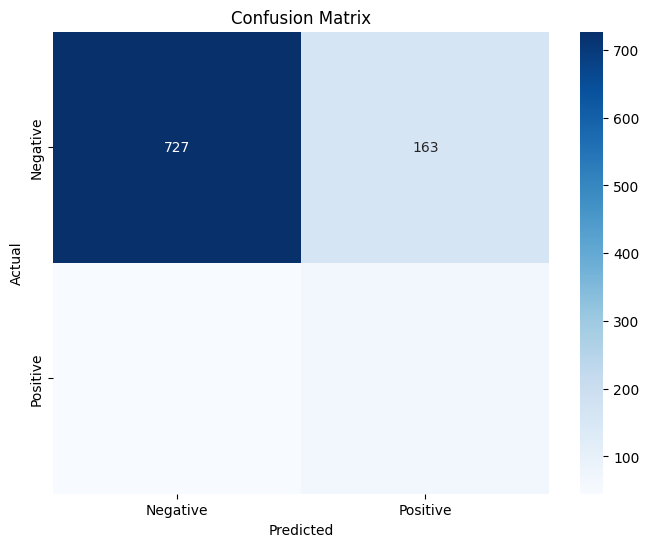

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Giả sử bạn đã có y_test và y_pred
# y_test: nhãn thực tế
# y_pred: nhãn dự đoán từ mô hình

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [9]:
cm

array([[727, 163],
       [ 45,  65]], dtype=int64)

In [43]:
# Lưu mô hình SVM
with open('./NB_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Lưu vectorizer
with open('./vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)